Name- Amey Tillu
Homework Assignment

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [7]:
df=pd.read_excel('credit.xlsx')
df.drop(['Loan ID','Customer ID'],axis=1, inplace=True) #Dropping IDs
medianincome=df['Income'].median()
df.Income=df.Income.fillna(value=medianincome)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Income,Years_in_job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,108790,Short Term,NaN,1188431.0,2.0,Own Home,Take a Trip,19392.35,10.5,10,0,140106,165352,0.0,0
1,Fully Paid,99999999,Short Term,746.0,1512248.0,10.0,Home Mortgage,Debt Consolidation,21297.48,33.0,12,0,390773,1023660,0.0,0
2,Charged Off,397870,Short Term,7410.0,1908930.0,1.0,Rent,Debt Consolidation,27997.64,20.3,10,0,214624,563508,0.0,0
3,Fully Paid,120384,Short Term,738.0,982965.0,2.0,Rent,Debt Consolidation,22935.66,11.2,16,0,180424,282326,0.0,0
4,Fully Paid,137918,Short Term,720.0,557194.0,6.0,Rent,Other,8645.95,17.9,13,0,151164,393338,0.0,0


In [9]:
df.describe()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+03,796.000000,1.000000e+03,962.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,997.000000,1000.000000
mean,1.119049e+07,1115.631910,1.360602e+06,6.230769,19020.440390,18.547200,11.410000,0.165000,3.189063e+05,7.418090e+05,0.116349,0.023000
std,3.107839e+07,1555.129892,8.231435e+05,3.499780,12415.435736,7.039321,5.063352,0.456052,4.168297e+05,1.406871e+06,0.347833,0.185757
min,2.246200e+04,586.000000,2.827010e+05,1.000000,0.000000,4.800000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.871155e+05,708.000000,9.417350e+05,3.000000,10719.372500,13.900000,8.000000,0.000000,1.205265e+05,2.899215e+05,0.000000,0.000000
50%,3.259300e+05,727.000000,1.188431e+06,7.000000,16878.745000,17.200000,11.000000,0.000000,2.170275e+05,4.909080e+05,0.000000,0.000000
75%,5.421735e+05,741.000000,1.490654e+06,10.000000,24534.320000,22.000000,14.000000,0.000000,3.791545e+05,8.044740e+05,0.000000,0.000000
max,1.000000e+08,7500.000000,1.193742e+07,10.000000,113343.740000,56.000000,48.000000,5.000000,6.506797e+06,2.634333e+07,3.000000,3.000000


In [11]:
df=df.dropna()  #df = df.fillna(df.median(numeric_only=True))
df.describe()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000,768.000000
mean,1.408414e+07,1121.460938,1.418974e+06,6.292969,19091.615872,18.284375,11.394531,0.153646,3.297771e+05,7.699559e+05,0.115885,0.020833
std,3.440218e+07,1565.556706,9.258885e+05,3.475577,12258.086266,6.910366,5.035138,0.398612,4.551217e+05,1.574073e+06,0.343853,0.160128
min,2.255000e+04,586.000000,2.827010e+05,1.000000,0.000000,4.800000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.006895e+05,708.000000,8.639918e+05,3.000000,10749.962500,13.500000,8.000000,0.000000,1.185458e+05,2.838880e+05,0.000000,0.000000
50%,3.318370e+05,727.000000,1.205265e+06,7.000000,17010.415000,17.000000,11.000000,0.000000,2.150990e+05,4.834060e+05,0.000000,0.000000
75%,5.681335e+05,742.000000,1.646972e+06,10.000000,24614.737500,21.900000,14.000000,0.000000,3.860088e+05,8.130485e+05,0.000000,0.000000
max,1.000000e+08,7500.000000,1.193742e+07,10.000000,106836.430000,48.800000,48.000000,2.000000,6.506797e+06,2.634333e+07,2.000000,2.000000


In [13]:
df['Loan_Dummy']=pd.get_dummies(df['Loan Status'],drop_first=True)
df['Term_Dummy']=pd.get_dummies(df['Term'],drop_first=True)
df.drop(['Term','Loan Status','Home Ownership', 'Purpose'],axis=1,inplace=True)
df.head()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
1,99999999,746.0,1512248.0,10.0,21297.48,33.0,12,0,390773,1023660,0.0,0,True,True
2,397870,7410.0,1908930.0,1.0,27997.64,20.3,10,0,214624,563508,0.0,0,False,True
3,120384,738.0,982965.0,2.0,22935.66,11.2,16,0,180424,282326,0.0,0,True,True
4,137918,720.0,557194.0,6.0,8645.95,17.9,13,0,151164,393338,0.0,0,True,True
5,154286,665.0,1167132.0,10.0,18674.15,32.2,7,0,19741,114884,0.0,0,False,True


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('Loan_Dummy',axis=1))
scaled_features=scaler.transform(df.drop('Loan_Dummy',axis=1))

In [17]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy
0,2.499023,-0.239982,0.100806,1.067289,0.180069,2.130888,0.120327,-0.385703,0.134108,0.161282,-0.33724,-0.130189,0.595397
1,-0.398091,4.019425,0.529519,-1.523896,0.727016,0.291871,-0.277140,-0.385703,-0.253181,-0.131241,-0.33724,-0.130189,0.595397
2,-0.406162,-0.245095,-0.471216,-1.235986,0.313797,-1.025849,0.915262,-0.385703,-0.328375,-0.309991,-0.33724,-0.130189,0.595397
3,-0.405652,-0.256600,-0.931367,-0.084348,-0.852700,-0.055659,0.319061,-0.385703,-0.392707,-0.239419,-0.33724,-0.130189,0.595397
4,-0.405176,-0.291755,-0.272178,1.067289,-0.034079,2.015044,-0.873341,-0.385703,-0.681660,-0.416435,-0.33724,-0.130189,0.595397


KNN Algorithm

In [20]:
X_train,X_test,y_train,y_test=train_test_split(df,df['Loan_Dummy'],
                                              test_size=0.30, random_state=42)

In [22]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred=knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[  3  50]
 [ 17 161]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.15      0.06      0.08        53
        True       0.76      0.90      0.83       178

    accuracy                           0.71       231
   macro avg       0.46      0.48      0.45       231
weighted avg       0.62      0.71      0.66       231



In [30]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

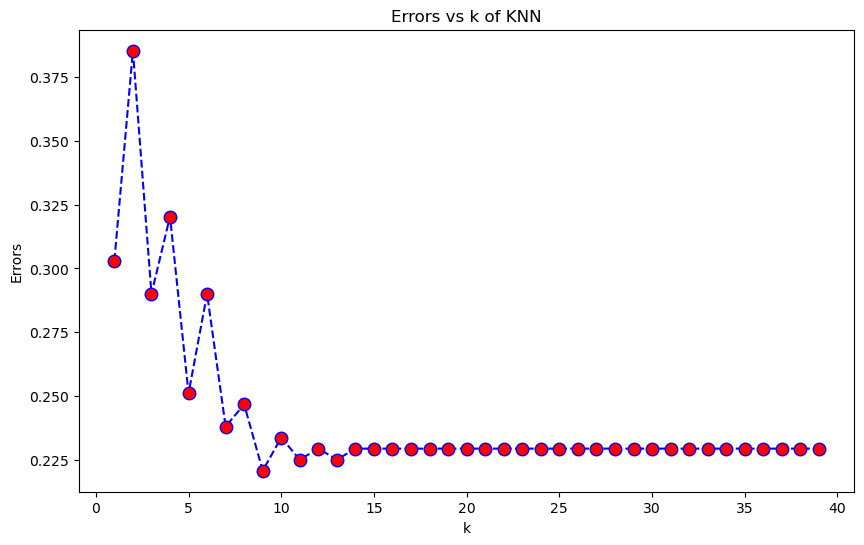

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=9)
plt.title( 'Errors vs k of KNN')
plt.xlabel('k')
plt.ylabel('Errors')
plt.show()

In [34]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        53
        True       0.77      1.00      0.87       178

    accuracy                           0.77       231
   macro avg       0.39      0.50      0.44       231
weighted avg       0.59      0.77      0.67       231



C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Question & Answers

B- Value of "k" can be choosen based on plots to visualize the relationship.  By observing the plot, we can identify the value of "k" that minimizes the error rate, which helps in selecting the optimal "k". If valur of "k" is too high it may underfit the model because it will take too many neighbours into account. The ideal valur of "k" is the one which balances overfitting and underfitting. 

C- Accuracy is defined as the proportions of correct predictions made relative to toal predictions made. When "k=3" the model achieves 71% accuracy. It means when using "k=3 nearest neighbours" The model correctly classifies 71% of the instances in the validation or test set.

D- When k = 16, the overall accuracy increases to about 77%. This means that out of all the predictions made on your validation or test data, approximately 77% are correct. 
While k = 3 can capture fine patterns, it also makes the model highly sensitive to the irregularities in the training data. With k = 16, the model averages out more information, which helps lower the variance. However, if k becomes too high, the model might overgeneralize and start underfitting the data. In this instance, moving to k = 16 seems to strike a better balance, as evidenced by the increase in accuracy from 71% to 77%.

CLASSIFICATION AND RANDOM FOREST

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score,log_loss)

import matplotlib.pylab as plt
from matplotlib.pyplot import subplots
%matplotlib inline

In [44]:
credit_df=pd.read_excel('loan_credit.xlsx')
credit_df=credit_df.dropna()
credit_df.head()

,Customer ID,Loan Status,Loan Amount,Term,Credit Score,Income,Years_in_job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Fully Paid,601.0,Short Term,746.0,1512248.0,10.0,Home Mortgage,Debt Consolidation,21297.48,33.0,12,0,390773,1023660,0.0,0
1,2,Fully Paid,605.0,Short Term,736.0,1231922.0,10.0,Home Mortgage,Debt Consolidation,21147.76,17.2,9,0,346921,486926,0.0,0
2,3,Fully Paid,636.0,Short Term,747.0,592496.0,10.0,Home Mortgage,Debt Consolidation,10319.28,24.0,17,0,332956,1208570,0.0,0
3,4,Fully Paid,691.0,Short Term,709.0,558999.0,2.0,Rent,Debt Consolidation,4276.33,9.7,12,0,169613,287122,0.0,0
4,5,Fully Paid,670.0,Short Term,747.0,1640821.0,10.0,Home Mortgage,Debt Consolidation,33636.84,21.8,11,0,1013118,1393194,0.0,0


In [46]:
credit_df['Loan_Dummy']=pd.get_dummies(credit_df['Loan Status'],drop_first=True).astype(int)
credit_df['Term_Dummy']=pd.get_dummies(credit_df['Term'],drop_first=True).astype(int)
credit_df.drop(['Customer ID','Loan Status','Term','Home Ownership','Purpose'],axis=1,inplace=True)
credit_df.head()

,Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
0,601.0,746.0,1512248.0,10.0,21297.48,33.0,12,0,390773,1023660,0.0,0,1,1
1,605.0,736.0,1231922.0,10.0,21147.76,17.2,9,0,346921,486926,0.0,0,1,1
2,636.0,747.0,592496.0,10.0,10319.28,24.0,17,0,332956,1208570,0.0,0,1,1
3,691.0,709.0,558999.0,2.0,4276.33,9.7,12,0,169613,287122,0.0,0,1,1
4,670.0,747.0,1640821.0,10.0,33636.84,21.8,11,0,1013118,1393194,0.0,0,1,1


In [48]:
credit_df.describe()

,Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
count,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000,768.000000,768.000000,768.000000
mean,372.357568,717.902344,1.418974e+06,6.292969,19091.615872,18.284375,11.394531,0.153646,3.297771e+05,7.699559e+05,0.115885,0.020833,0.798177,0.738281
std,210.341379,29.358497,9.258885e+05,3.475577,12258.086266,6.910366,5.035138,0.398612,4.551217e+05,1.574073e+06,0.343853,0.160128,0.401622,0.439857
min,22.550000,586.000000,2.827010e+05,1.000000,0.000000,4.800000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,200.689500,706.000000,8.639918e+05,3.000000,10749.962500,13.500000,8.000000,0.000000,1.185458e+05,2.838880e+05,0.000000,0.000000,1.000000,0.000000
50%,331.837000,725.000000,1.205265e+06,7.000000,17010.415000,17.000000,11.000000,0.000000,2.150990e+05,4.834060e+05,0.000000,0.000000,1.000000,1.000000
75%,568.133500,740.000000,1.646972e+06,10.000000,24614.737500,21.900000,14.000000,0.000000,3.860088e+05,8.130485e+05,0.000000,0.000000,1.000000,1.000000
max,787.798000,751.000000,1.193742e+07,10.000000,106836.430000,48.800000,48.000000,2.000000,6.506797e+06,2.634333e+07,2.000000,2.000000,1.000000,1.000000


In [50]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Amount                768 non-null    float64
 1   Credit Score               768 non-null    float64
 2   Income                     768 non-null    float64
 3   Years_in_job               768 non-null    float64
 4   Monthly Debt               768 non-null    float64
 5   Years of Credit History    768 non-null    float64
 6   Number of Open Accounts    768 non-null    int64  
 7   Number of Credit Problems  768 non-null    int64  
 8   Current Credit Balance     768 non-null    int64  
 9   Maximum Open Credit        768 non-null    int64  
 10  Bankruptcies               768 non-null    float64
 11  Tax Liens                  768 non-null    int64  
 12  Loan_Dummy                 768 non-null    int32  
 13  Term_Dummy                 768 non-null    int32  
dtyp

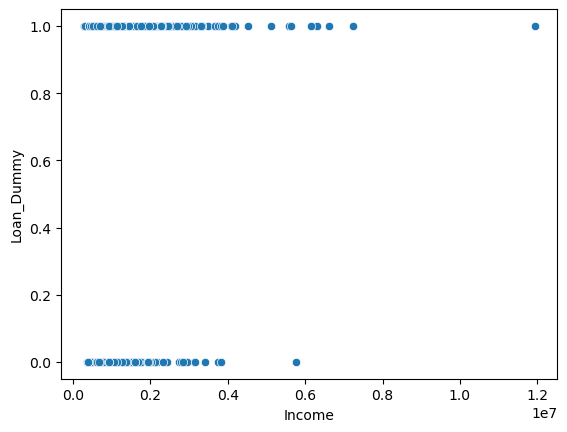

In [52]:
sns.scatterplot(x='Income', y='Loan_Dummy',data=credit_df) #, hue='Term_Dummy')
plt.show()

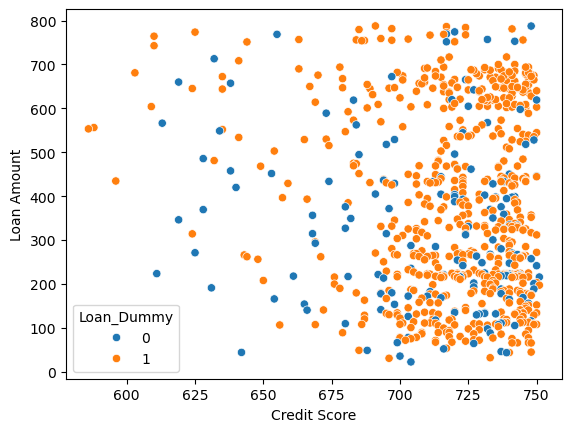

In [54]:
sns.scatterplot(x='Credit Score', y='Loan Amount',data=credit_df, hue='Loan_Dummy')
plt.show()

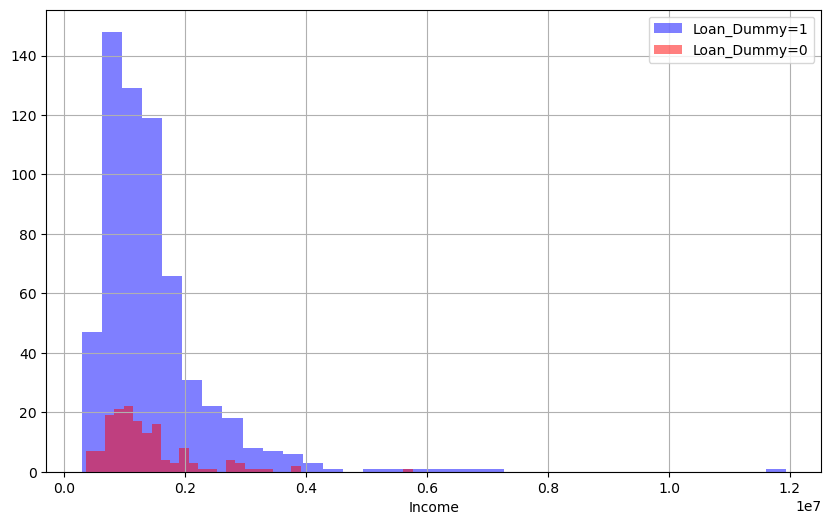

In [56]:
plt.figure(figsize=(10,6))
credit_df[credit_df['Loan_Dummy']==1]['Income'].hist(alpha=0.5,color='blue',
                                                    bins=35,label='Loan_Dummy=1')
credit_df[credit_df['Loan_Dummy']==0]['Income'].hist(alpha=0.5,color='red',
                                                    bins=35,label='Loan_Dummy=0')
plt.legend()
plt.xlabel('Income')
plt.show()

In [58]:
X=credit_df.drop(['Loan_Dummy'],axis=1)
y=credit_df['Loan_Dummy']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=1)

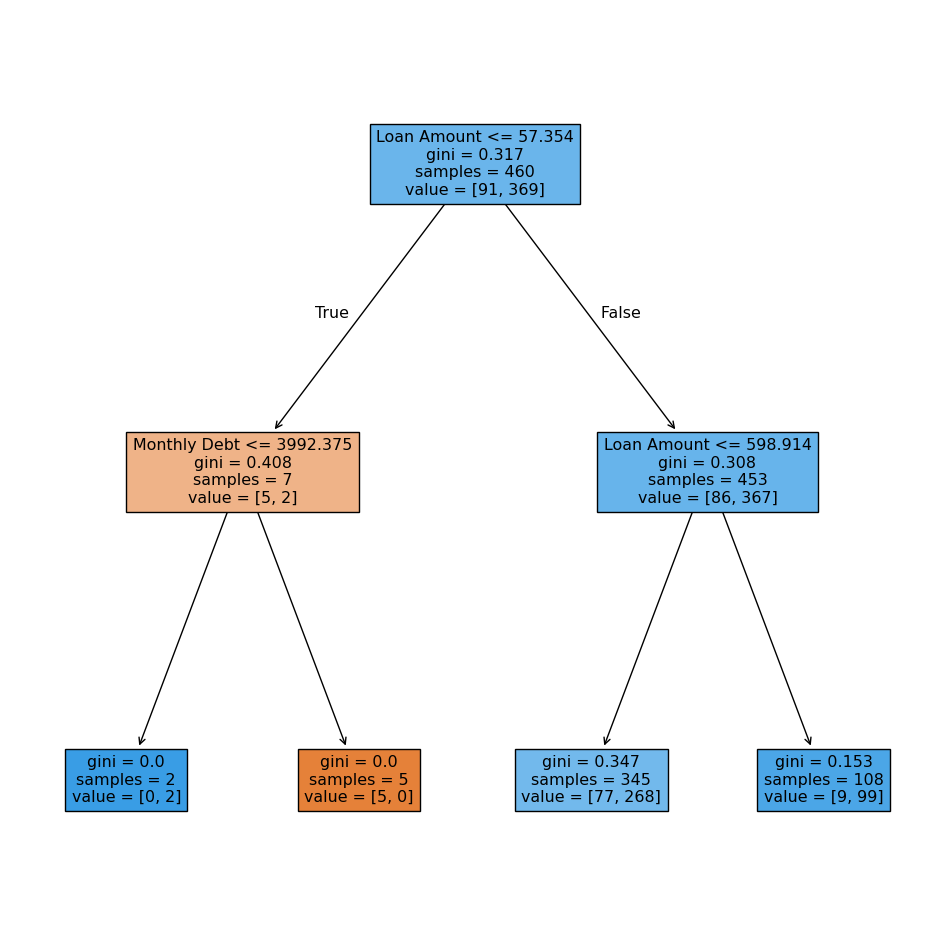

In [62]:
dtree=DecisionTreeClassifier(max_depth=2,random_state=1)
dtree.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dtree, filled=True, feature_names=list(X.columns), ax=ax)
plt.show()

PREDICTIONS

In [65]:
tree_predict=dtree.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,tree_predict))
print('\n')
print(classification_report(y_test,tree_predict))

[[  2  62]
 [  4 240]]


              precision    recall  f1-score   support

           0       0.33      0.03      0.06        64
           1       0.79      0.98      0.88       244

    accuracy                           0.79       308
   macro avg       0.56      0.51      0.47       308
weighted avg       0.70      0.79      0.71       308



In [69]:
labels = np.array([["TN", "FP"], ["FN", "TP"]])

# Convert to DataFrame for better visualization
cm_labels = pd.DataFrame(labels, 
                         index=["Actual Negative (0)", "Actual Positive (1)"], 
                         columns=["Predicted Negative (0)", "Predicted Positive (1)"])

display(cm_labels)

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),TN,FP
Actual Positive (1),FN,TP


In [71]:
accuracy= accuracy_score(y_test, tree_predict)
print(accuracy)

0.7857142857142857


RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,max_depth=4,random_state=1) #n_estimators= the number of trees grown
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=1)

Random Forest predictions

In [77]:
rfc_pred=rfc.predict(X_test)

In [79]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[  0  64]
 [  0 244]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.79      1.00      0.88       244

    accuracy                           0.79       308
   macro avg       0.40      0.50      0.44       308
weighted avg       0.63      0.79      0.70       308



C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\knowl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
accuracy_score(y_test, rfc_pred)

0.7922077922077922

In [83]:
importances=rfc.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

df=pd.DataFrame({'feature':X_train.columns,'importance':importances,'std':std})
df=df.sort_values('importance',ascending=True)
print(df)

ax=df.plot(kind='barh',xerr='std', x='feature',legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show

                      feature  importance       std
10               Bankruptcies    0.006479  0.024906
7   Number of Credit Problems    0.010416  0.033063
11                  Tax Liens    0.013142  0.040338
12                 Term_Dummy    0.013328  0.037887
3                Years_in_job    0.038509  0.066270
6     Number of Open Accounts    0.064553  0.081845
9         Maximum Open Credit    0.083943  0.101735
4                Monthly Debt    0.094474  0.105509
8      Current Credit Balance    0.097836  0.110087
2                      Income    0.111242  0.123031
5     Years of Credit History    0.115011  0.120436
1                Credit Score    0.142348  0.123140
0                 Loan Amount    0.208719  0.166342


<function matplotlib.pyplot.show(close=None, block=None)>

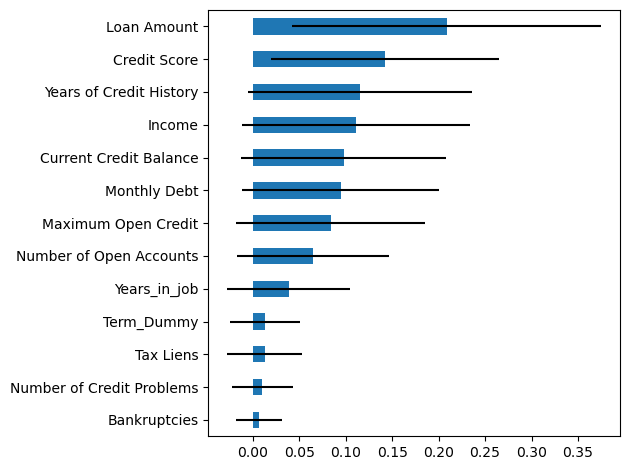

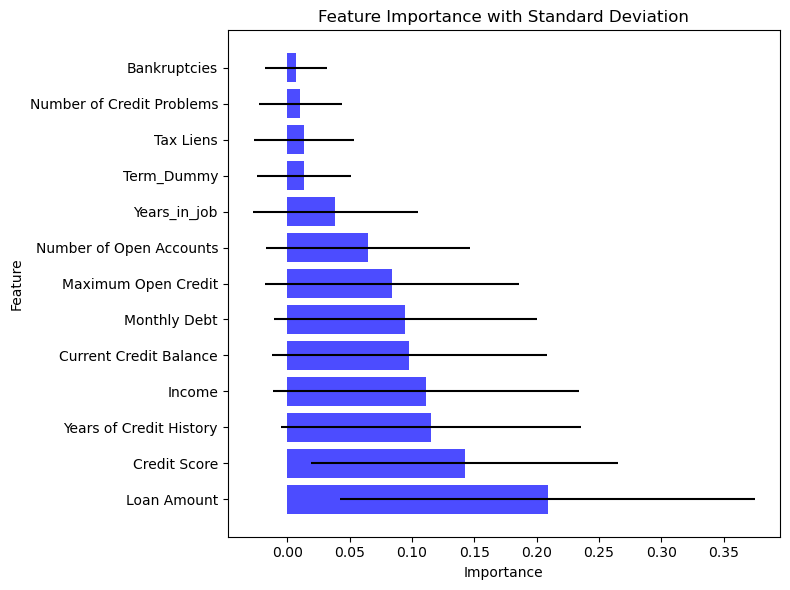

In [85]:
# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(df['feature'], df['importance'], xerr=df['std'], color='blue', alpha=0.7)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance with Standard Deviation")
plt.gca().invert_yaxis()  # Ensures the highest importance is at the top

plt.tight_layout()
plt.show()

QUESTION & ANSWERS

B- The accuracy of first decission tree is 0.79 which means 79%. Out of all the predictions made on the test set (which includes 308 samples in this case), 79% of them were correct. This means approximately 242 of the 308 instances were classified correctly by the model.

C- Decision Tree (Model B): The decision tree model achieved an accuracy score of 79%. This means that when predicting on the test dataset, the model correctly classified 79% of the instances.
Random Forest (Model C): The random forest model achieved a higher accuracy score. (For example, if it scored 83%, then it correctly classified 83 out of 100 cases.)
Random forest has the higher accuracy, it is better than Decision tree model. More the accuracy more the model has better generalization performance. 
